- references
    - https://www.youtube.com/watch?v=l87rgLg90HI

In [1]:
from IPython.display import Image
from collections import defaultdict
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
import sys
import os
sys.path.append(os.path.abspath('../'))

## MDPs with $P$ and $R$

- solving MDPs 
    - finding the optimal policy

- MDPs
    - $S$: set of states
    - $A$: set of actions
    - $P$: transition function
    - $R$: reward function

### bellman equation

$$
V^*(s)=\max_{a\in A}\sum_{s'\in S}P(s'|s,a)\left[R(s,a,s')+\gamma V^*(s')\right]
$$

- 状态 $V^*(s)$ 的递归定义；
- iteratively solve via dynamic programming
    - start with $V_0(s)=0$ for all states $s$
        - $V_{t+1}(s)\leftarrow \max_{a\in A}\sum_{s'\in S}P(s'|s,a)\left[R(s,a,s')+\gamma V_t(s')\right]$
    - 迭代更新 bellman equation 直到收敛
- note
    - $R(s_k,a_k)$：表示在 $s_k$ 时采取 $a_k$ 就能得到的 reward（reward 的计算仅依赖当前状态 $s_k$ 和当前状态下采取的 $a_k$
    - $P(s_{k+1}|s_k,a_k)$ 这里刻画转移；

### value iteration algo

- $Q(s,a)$: expected total reward for taking action $a$ in state $s$；
    - 如下是不考虑折扣因子的情况

    $$
    Q(s,a)=R(s,a)+\sum_{s'}P(s'|s,a)V(s')
    $$
    
    - 考虑折扣因子的情况
    
    $$
    Q(s,a)=R(s,a)+\gamma\sum_{s'}P(s'|s,a)V(s')
    $$
    
- $V(s)$：maximum expected total reward starting from state $s$（value function）

    $$
    V^*(s)=\max_{a}Q(s,a)
    $$

In [ ]:
Image('../../imgs/value_iteration.png', width=400)

### gambler's game

In [ ]:
# target 
N = 10
# win bet
p = 0.4
S = [*range(0, N+1)]
A = [*range(0, N+1)]

In [ ]:
def value_iteration(S, A, P, R):
    V = {s: 0 for s in S}
    optimal_policy = {}
    while True:
        oldV = V.copy()
        for s in S:
            Q={}
            for a in A:
                Q[a] = R(s,a) + sum(P(s, a, s_next) * oldV[s_next] for s_next in S)
            V[s] = max(Q.values())
            optimal_policy[s] = max(Q, key=Q.get)
        if all(oldV[s] == V[s] for s in S):
            break
    return V, optimal_policy

In [ ]:
def P(s, a, s_next):
    if a <= min(s, N-s) and 0 < s < N and s_next == s + a:
        return p
    elif a <= min(s, N-s) and 0 < s < N and s_next == s - a:
        return 1-p
    return 0

In [ ]:
def R(s, a):
    if s == N:
        return 1
    return 0

In [ ]:
V, optimal_policy = value_iteration(S, A, P, R)

In [ ]:
V

In [ ]:
optimal_policy

## grid world

- value function: $V(s)$（关于状态 $s$ 的价值函数）
    - 数据结构：`defaultdict(lambda: 0.)`（key：state）
- q table：$Q(s,a)$
    - 数据结构：`defaultdict(lambda: 0.)`（key：(state, action)）
- 以上两个都是离散状态

In [3]:
class ValueIteration:
    def __init__(self, mdp):
        self.mdp = mdp
        self.V = defaultdict(lambda: 0.0)
        self.Q = defaultdict(lambda: 0.0)

    def value_iteration(self, max_iterations=100, theta=0.001):

        for i in range(max_iterations):
            delta = 0.0
            new_values = defaultdict(lambda: 0.0)
            # 状态空间
            for state in self.mdp.get_states():
#                 # 计算 q(state, a) given state
#                 qtable = defaultdict(lambda: 0.)
                # 动作空间: 当前状态 state 下允许转移的 action（valid action）
                for action in self.mdp.get_actions(state):
                    # Calculate the value of Q(s,a)
                    new_value = 0.0
                    for (new_state, probability) in self.mdp.get_transitions(state, action):
                        # instant reward
                        reward = self.mdp.get_reward(state, action, new_state)
                        new_value += probability * (
                            reward + (self.mdp.get_discount_factor() * self.V[new_state])
                        )
#                     qtable[(state, action)] = new_value
                    self.Q[(state, action)] = new_value

                # V(s) = max_a Q(sa)
                max_q = float('-inf')
                arg_max_q = None
                for action in self.mdp.get_actions(state):
                    if max_q < self.Q[(state, action)]:
                        max_q = self.Q[(state, action)]
                        arg_max_q = action 
                        
                delta = max(delta, abs(self.V[state] - max_q))
                new_values[state] = max_q

            self.V = new_values.copy()
            print(f'iteration: {i}, max delta: {delta}')
            # Terminate if the value function has converged
            if delta < theta:
                return i

In [4]:
os.chdir('./utils') 

In [5]:
from utils import gridworld

In [6]:
gw = gridworld.GridWorld()

In [7]:
model = ValueIteration(gw)

In [8]:
model.value_iteration()

iteration: 0, max delta: 1.0
iteration: 1, max delta: 0.7200000000000001
iteration: 2, max delta: 0.5184000000000001
iteration: 3, max delta: 0.3732480000000001
iteration: 4, max delta: 0.26873856000000007
iteration: 5, max delta: 0.21347919360000006
iteration: 6, max delta: 0.13127206809600006
iteration: 7, max delta: 0.07603935720192012
iteration: 8, max delta: 0.03713760877501443
iteration: 9, max delta: 0.017503646213894386
iteration: 10, max delta: 0.00782998158524284
iteration: 11, max delta: 0.006619227655718318
iteration: 12, max delta: 0.003824154683289116
iteration: 13, max delta: 0.002105095303100324
iteration: 14, max delta: 0.0010683398432171365
iteration: 15, max delta: 0.0005207601015905228


15

In [ ]:
model.V

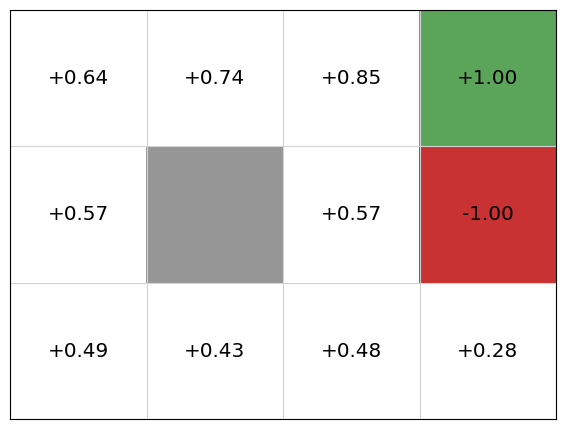

In [9]:
gw.visualise_value_function(model.V)

In [10]:
def get_q_value(mdp, s, a, V):
    q_value = 0.0
    for (next_s, p) in mdp.get_transitions(s, a):
        r = mdp.get_reward(s, a, next_s)
#         print(s, a, next_s, p, r)
        q_value += p*(r + mdp.discount_factor * V[next_s])
    return q_value

def extract_policy(mdp, V):
    policy = defaultdict(lambda: None)
    for s in mdp.get_states():
        max_q = float('-inf')
        for a in mdp.get_actions(s):
            cur_q = get_q_value(mdp, s, a, V)
#             print(s, a, cur_q)
            if cur_q > max_q:
                max_q = cur_q
                policy[s] = a
    return policy

In [14]:
policy = extract_policy(gw, model.V)
policy

defaultdict(<function __main__.extract_policy.<locals>.<lambda>()>,
            {('terminal', 'terminal'): 'terminate',
             (0, 0): '▲',
             (0, 1): '▲',
             (0, 2): '►',
             (1, 0): '◄',
             (1, 2): '►',
             (2, 0): '▲',
             (2, 1): '▲',
             (2, 2): '►',
             (3, 0): '◄',
             (3, 1): 'terminate',
             (3, 2): 'terminate'})

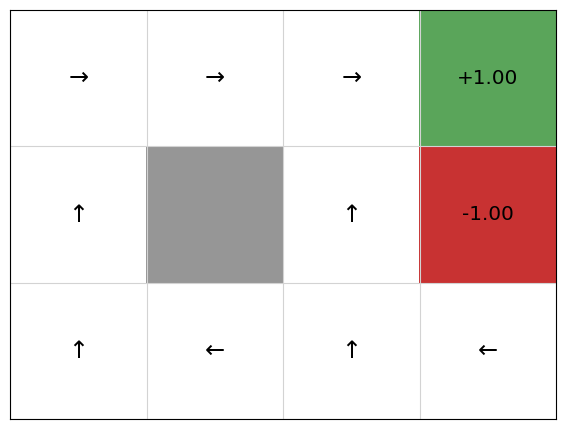

In [15]:
gw.visualise_policy(policy)

In [16]:
policy_2 = defaultdict(lambda: None)
for (s, a)

defaultdict(<function __main__.ValueIteration.__init__.<locals>.<lambda>()>,
            {(('terminal', 'terminal'), 'terminate'): 0.0,
             ((0, 0), '▲'): 0.4905111290848818,
             ((0, 0), '▼'): 0.4358313274983339,
             ((0, 0), '◄'): 0.4481047986029814,
             ((0, 0), '►'): 0.40459683135234953,
             ((0, 1), '▲'): 0.5662859470207978,
             ((0, 1), '▼'): 0.4549397738012999,
             ((0, 1), '◄'): 0.5098678966436481,
             ((0, 1), '►'): 0.5098678966436481,
             ((0, 2), '▲'): 0.5894014364519162,
             ((0, 2), '▼'): 0.5327350648189662,
             ((0, 2), '◄'): 0.5733692434749165,
             ((0, 2), '►'): 0.6449604156579638,
             ((1, 0), '▲'): 0.39640443660932984,
             ((1, 0), '▼'): 0.39640443660932984,
             ((1, 0), '◄'): 0.430392831592005,
             ((1, 0), '►'): 0.4195334752343953,
             ((1, 2), '▲'): 0.6702974088148523,
             ((1, 2), '▼'): 0.6702974088148523